# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [6]:
df = pd.read_csv("data/vehicles.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [8]:
vdf = df.dropna()
df.size
vdf.size

vdf = vdf.sample(100)
vdf.size

1800

In [10]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
dtype: int64

In [12]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


In [14]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts().head(5))

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
Name: count, dtype: int64
manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
Name: count, dtype: int64
model
f-150             8009
silverado 1500    5140
1500              4211
camry             3135
silverado         3023
Name: count, dtype: int64
condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
Name: count, dtype: int64
cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
Name: count, dtype: int64
fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64
title_status
clean      405117
rebuilt      7219
salvage      3868
lien         1422
missing       814
Name: count, dt

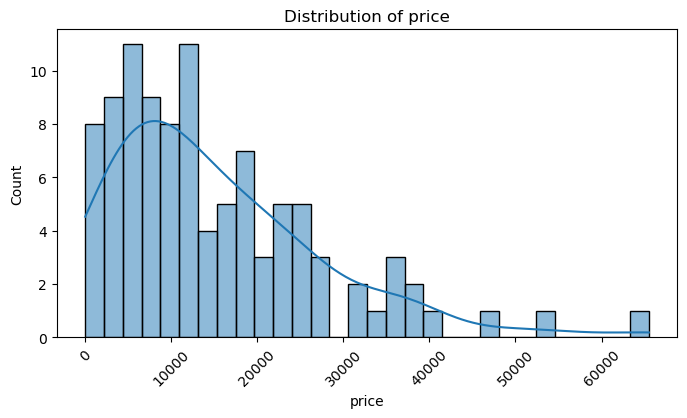

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(vdf['price'], kde=True, bins=30)
plt.title(f'Distribution of price')
plt.xticks(rotation=45)
plt.show()

In [18]:
pdf = vdf[vdf['price']>10000]
pdf 

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
172920,7311701598,louisville,37900,2020.0,chevrolet,silverado 1500,like new,8 cylinders,gas,5622.0,clean,automatic,3GCPWAEF0LG200571,rwd,full-size,truck,white,ky
415521,7309982299,appleton-oshkosh-FDL,15000,2010.0,toyota,rav4,excellent,4 cylinders,gas,92919.0,clean,automatic,2T3DF4DV2AW045791,4wd,mid-size,SUV,silver,wi
251853,7306894931,central NJ,26990,2016.0,ford,super duty f-750 straight frame,good,8 cylinders,diesel,201035.0,clean,automatic,1FDWF7DC4GDA01690,rwd,full-size,truck,white,nj
201439,7311846091,grand rapids,18500,2010.0,ford,f150 xlt,good,8 cylinders,gas,61000.0,clean,automatic,1FTFW1EV3AFD81554,4wd,full-size,truck,black,mi
379758,7303753380,odessa / midland,25995,2014.0,ram,2500,excellent,6 cylinders,diesel,161871.0,clean,automatic,3C6UR5HL8EG241172,4wd,full-size,pickup,white,tx
214701,7316330342,minneapolis / st paul,10995,2014.0,ford,econoline,good,10 cylinders,gas,119997.0,clean,automatic,1FDFE4FS2EDB05551,rwd,full-size,truck,white,mn
144893,7310935212,rockford,22995,2017.0,honda,pilot,excellent,6 cylinders,gas,101336.0,clean,automatic,5FNYF6H5XHB101466,4wd,full-size,SUV,grey,il
58309,7306736797,san luis obispo,25995,2018.0,nissan,frontier,good,6 cylinders,gas,10465.0,clean,automatic,1N6AD0ER6JN755655,rwd,full-size,truck,silver,ca
417071,7316552694,green bay,37990,2014.0,ram,2500,good,8 cylinders,gas,67558.0,clean,automatic,3C6UR5DJ6EG272103,4wd,full-size,truck,silver,wi
309955,7306931103,tulsa,47990,2014.0,ford,super duty f-550 drw,good,8 cylinders,diesel,39253.0,clean,automatic,1FDUF5HT8EEA80861,4wd,full-size,truck,white,ok


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

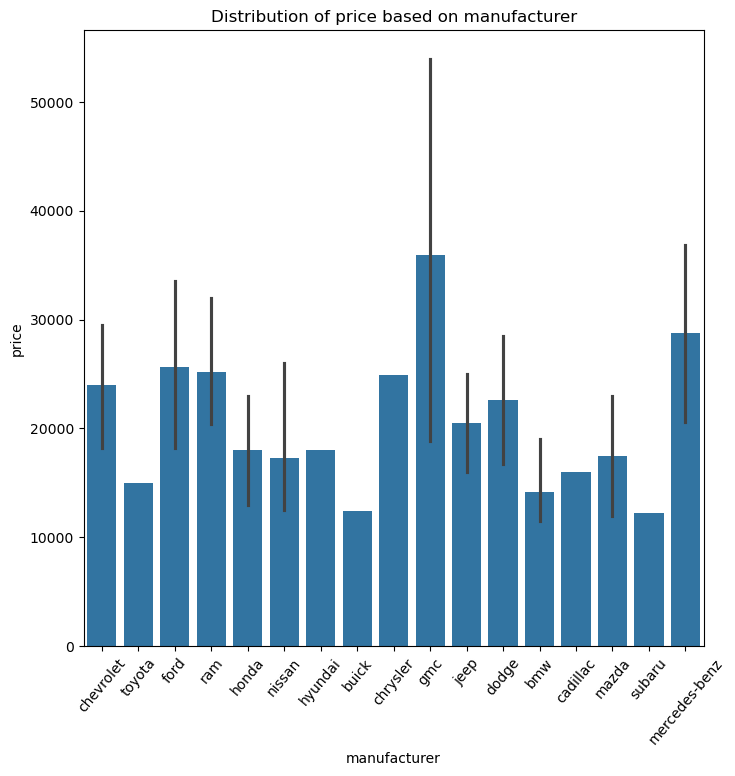

In [20]:
## Find which is the highest priced manufacturer
plt.figure(figsize=(8, 8))
sns.barplot(data= pdf, x='manufacturer', y='price')
plt.title(f'Distribution of price based on manufacturer')
plt.xticks(rotation=50)
plt.show()

### Based on the chart above, Here are top 5 models based on price
1. Porsche
2. Ram
3. Mercedes-benz
4. Audi
5. Ford

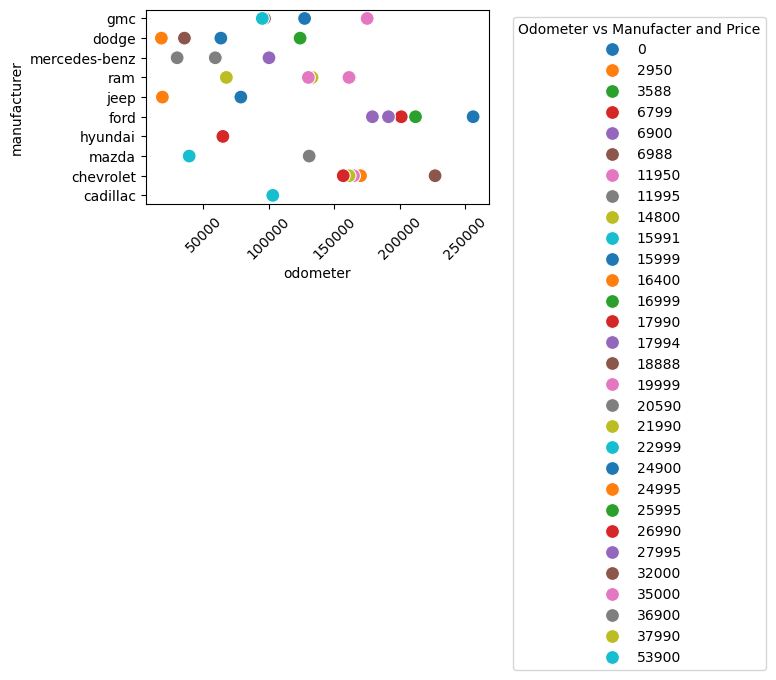

/var/folders/tw/y7wg975532q50lg_grnbs4rw0000gq/T/ipykernel_32949/1096245523.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=omdf, x='odometer', y='price', palette='tab10')


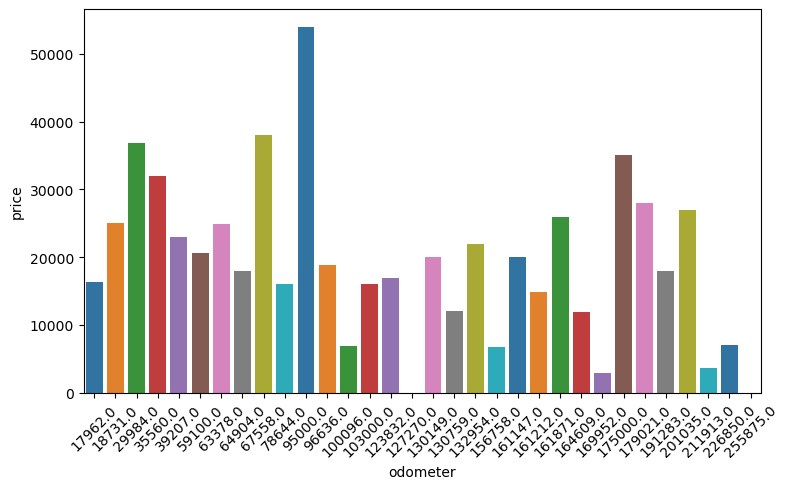

In [22]:
#Will find which Manufacture gives more mileage on top 10 manufacturer based on price
mdf = vdf.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(10).reset_index()
df_mdf = vdf[vdf['manufacturer'].isin(mdf['manufacturer'])]

omdf_list = []
for mf in mdf['manufacturer']:
    top_odometer = df_mdf[df_mdf['manufacturer']==mf].nlargest(5,'odometer')
    omdf_list.append(top_odometer)

omdf = pd.concat(omdf_list, ignore_index=True)
omdf = omdf[['manufacturer', 'model', 'odometer', 'year', 'price']]

plt.figure(figsize=(8,5))
sns.scatterplot(data=omdf, x='odometer', y='manufacturer', hue='price', palette='tab10', s=100)
plt.xticks(rotation=45)
plt.xlabel('odometer')
plt.ylabel('manufacturer')
plt.legend(title='Odometer vs Manufacter and Price', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,5))
sns.barplot(data=omdf, x='odometer', y='price', palette='tab10')
plt.xticks(rotation=45)
plt.xlabel('odometer')
plt.ylabel('price')
plt.tight_layout()
plt.show()


### Best car price and milege values are
1. porsche with less Odometer reading
2. Benz
3. Ram

  Along with odometer and model it defines the price range


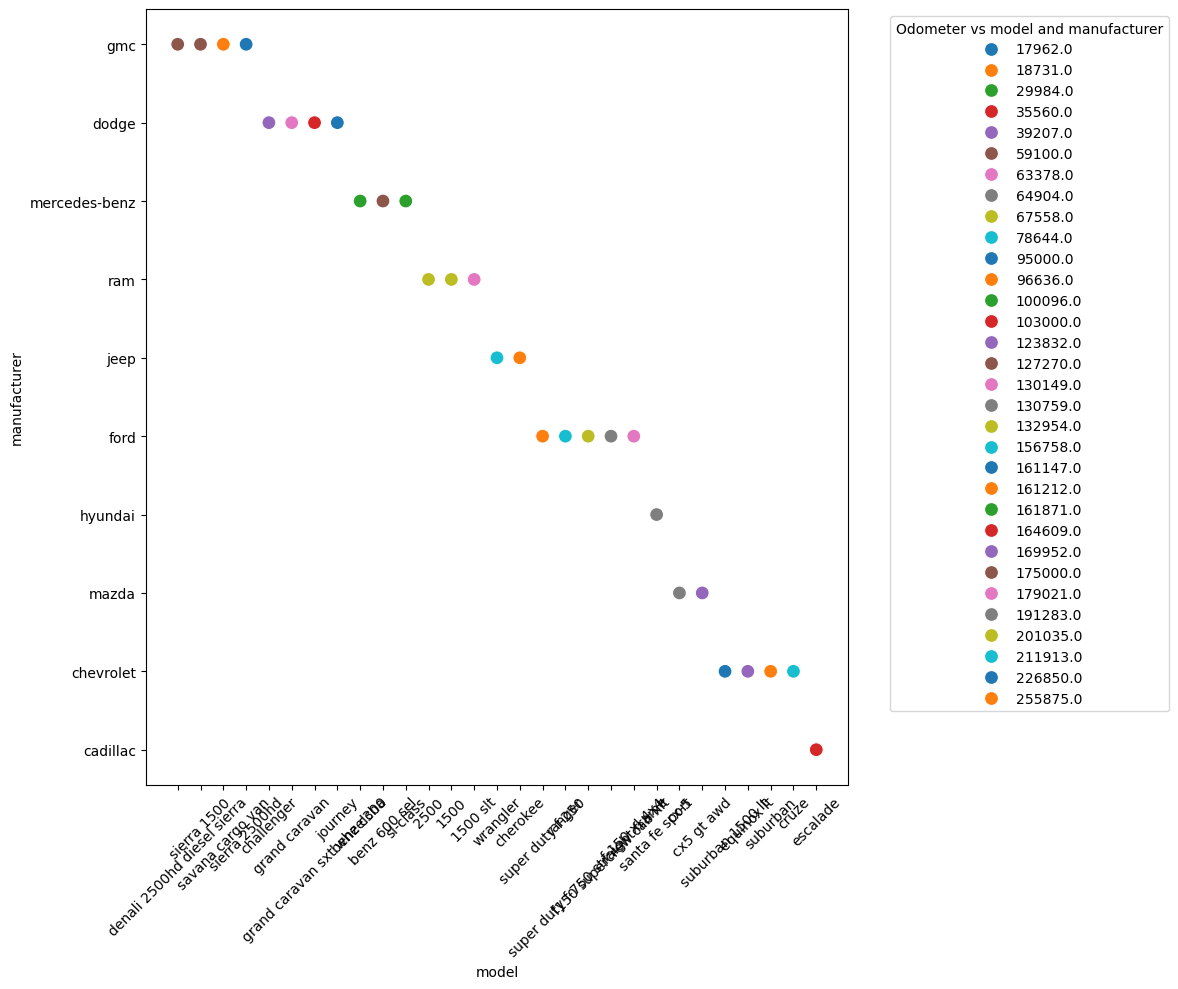

In [24]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=omdf, x='model', y='manufacturer', hue='odometer', palette='tab10', s=100)
plt.xticks(rotation=45)
plt.xlabel('model')
plt.ylabel('manufacturer')
plt.legend(title='Odometer vs model and manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### In the above chart, I tried to understand the relation between mileage, model and manufacture
### Want to see which model gives highest mileage in each manufacturer

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [27]:
# Drop columns
# Drop id, as it is not useful for our analysis
# Drop size column as ~72% of the values are missing.
vehicles_df = vdf.drop(['id', 'size'], axis=1)
vehicles_df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
172920,louisville,37900,2020.0,chevrolet,silverado 1500,like new,8 cylinders,gas,5622.0,clean,automatic,3GCPWAEF0LG200571,rwd,truck,white,ky
415521,appleton-oshkosh-FDL,15000,2010.0,toyota,rav4,excellent,4 cylinders,gas,92919.0,clean,automatic,2T3DF4DV2AW045791,4wd,SUV,silver,wi
83790,hartford,8900,2013.0,subaru,impreza sport premium awd,like new,4 cylinders,gas,85667.0,clean,automatic,JF1GPAL6XD2842621,4wd,hatchback,red,ct
251853,central NJ,26990,2016.0,ford,super duty f-750 straight frame,good,8 cylinders,diesel,201035.0,clean,automatic,1FDWF7DC4GDA01690,rwd,truck,white,nj
331122,lehigh valley,5900,2007.0,pontiac,g6,good,6 cylinders,gas,105000.0,clean,automatic,1G2ZH36N374159719,fwd,convertible,black,pa


<Axes: >

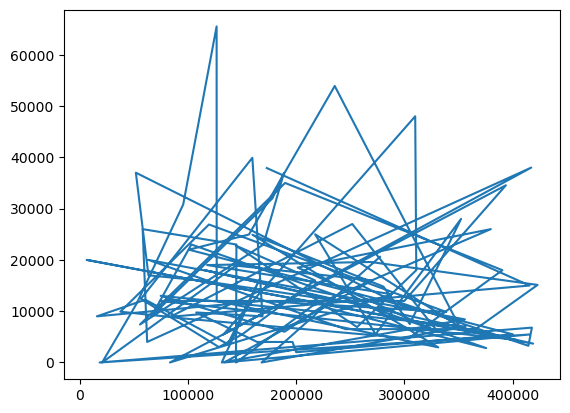

In [29]:
# Visualize price column to understand if there are outliers
vehicles_df['price'].plot()

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Work on a copy
# Drop rows where price or odometer is missing or clearly invalid
vehicles_df = vdf.dropna(subset=['price', 'odometer'])
vehicles_df = vdf[vdf['price'] > 100]  # remove unrealistic prices

In [73]:
# # Drop columns that are text-heavy or IDs
# drop_cols = ['description', 'posting_date', 'image_url', 'url', 'vin', 'id', 'region_url']
# vehicles_df = vehicles_df.drop(columns=[col for col in drop_cols if col in vehicles_df.columns])
# # Identify categorical columns
# cat_cols = vehicles_df.select_dtypes(include='object').columns

# # One-hot encode them
# vehicles_df = pd.get_dummies(vehicles_df, columns=cat_cols, drop_first=True)
# vehicles_df['log_price'] = np.log(vehicles_df['price'])

# # Standardize continuous features
# scale_cols = ['odometer', 'car_age', 'mileage_k']
# scaler = StandardScaler()
# vehicles_df[scale_cols] = scaler.fit_transform(vehicles_df[scale_cols])
# X = vehicles_df.drop(columns=['price', 'log_price'])  # Drop both to be safe
# y = vehicles_df['log_price']  # or use 'price' if you don’t want log transform

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
X_train

,year,odometer,car_age,mileage_k,region_ann arbor,region_appleton-oshkosh-FDL,region_atlanta,region_bakersfield,region_beaumont / port arthur,region_bellingham,...,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_va,state_vt,state_wa,state_wi
245712,2014.0,-1.145848,-0.424864,-1.145848,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
342658,2016.0,-0.590702,-0.628445,-0.590702,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
169061,2014.0,-0.032311,-0.424864,-0.032311,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22648,2012.0,0.482339,-0.221283,0.482339,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
172987,2014.0,-1.212875,-0.424864,-1.212875,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251710,2002.0,0.168411,0.796620,0.168411,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30043,2016.0,-1.969604,-0.628445,-1.969604,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
160547,2007.0,0.127790,0.287668,0.127790,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
347345,1998.0,1.970520,1.203781,1.970520,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# Copy dataset
df = vehicles_df.copy()

# Target: log of price (reduces skew)
df = df[df['price'] > 100]  # filter out unrealistic values
df['log_price'] = np.log(df['price'])

# Feature engineering
df['car_age'] = 2025 - df['year']
df['mileage_k'] = df['odometer'] / 1000

# Drop irrelevant columns
drop_cols = ['price', 'year', 'description', 'posting_date', 
             'image_url', 'url', 'vin', 'id', 'region_url']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# One-hot encode categoricals
df = pd.get_dummies(df, drop_first=True)

# Scale selected numeric features
scale_cols = ['odometer', 'car_age', 'mileage_k']
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Features and target
X = df.drop(columns=['log_price'])
y = df['log_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [55]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42)
}

# ======================
# 3. Training & Evaluation
# ======================
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    cv = cross_val_score(model, X, y, cv=5, scoring="r2").mean()

    results[name] = {"R2": r2, "RMSE": rmse, "MAE": mae, "CV R2": cv}

results_df = pd.DataFrame(results).T.sort_values("R2", ascending=False).round(3)
print(results_df)

                      R2   RMSE    MAE  CV R2
Lasso              0.788  0.379  0.315  0.587
Ridge              0.781  0.385  0.298  0.633
Linear Regression  0.780  0.386  0.298  0.626
Gradient Boosting  0.771  0.394  0.298  0.647
Random Forest      0.729  0.428  0.323  0.632
AdaBoost           0.685  0.462  0.363  0.620
Decision Tree      0.415  0.629  0.530  0.473


In [59]:
results_df.head()

,R2,RMSE,MAE,CV R2
Lasso,0.788,0.379,0.315,0.587
Ridge,0.781,0.385,0.298,0.633
Linear Regression,0.780,0.386,0.298,0.626
Gradient Boosting,0.771,0.394,0.298,0.647
Random Forest,0.729,0.428,0.323,0.632


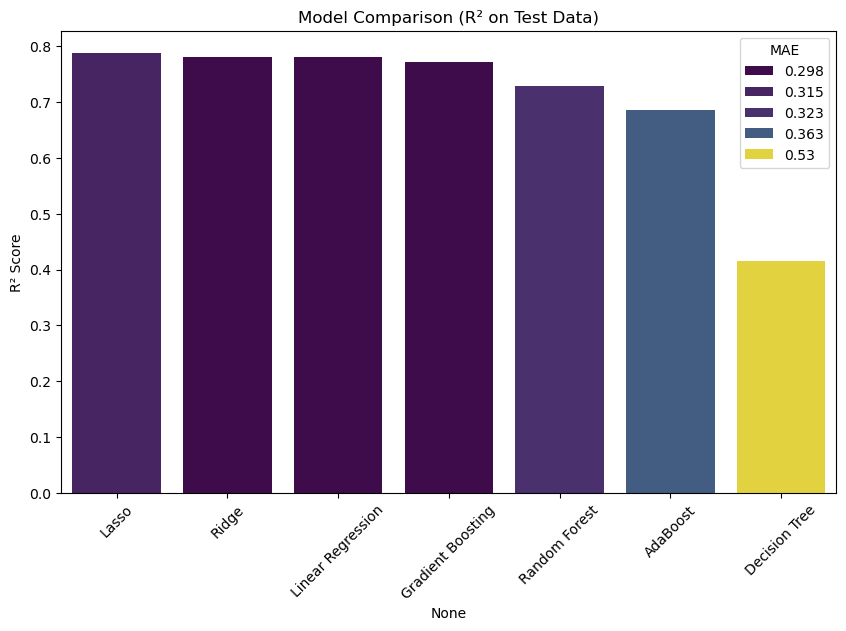

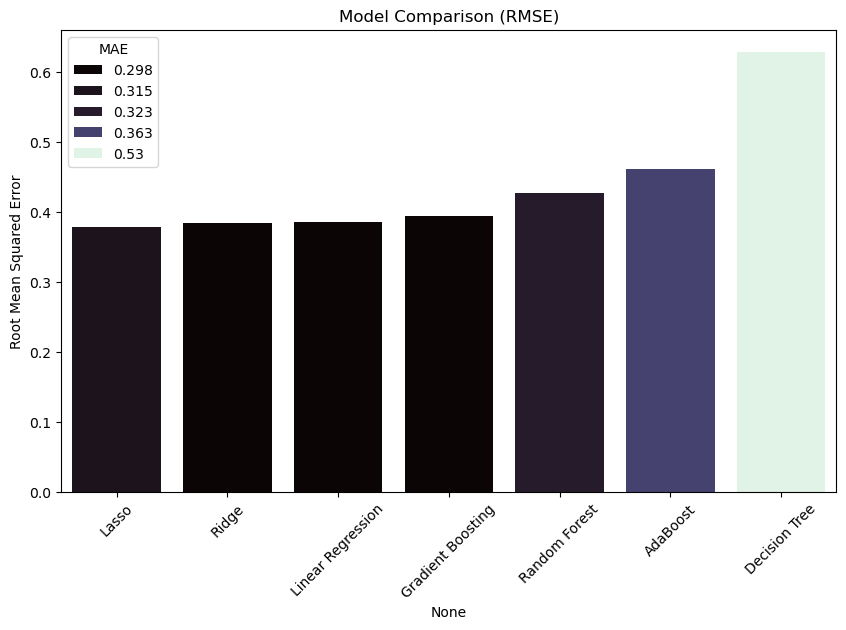

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R2'], palette="viridis",hue=results_df['MAE'])
plt.title("Model Comparison (R² on Test Data)")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.show()

# RMSE comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['RMSE'], palette="mako", hue=results_df['MAE'])
plt.title("Model Comparison (RMSE)")
plt.ylabel("Root Mean Squared Error")
plt.xticks(rotation=45)
plt.show()



### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

=== Model Evaluation ===
R² on test set: 0.717
RMSE: 0.438
MAE: 0.331
5-Fold CV R²: 0.645


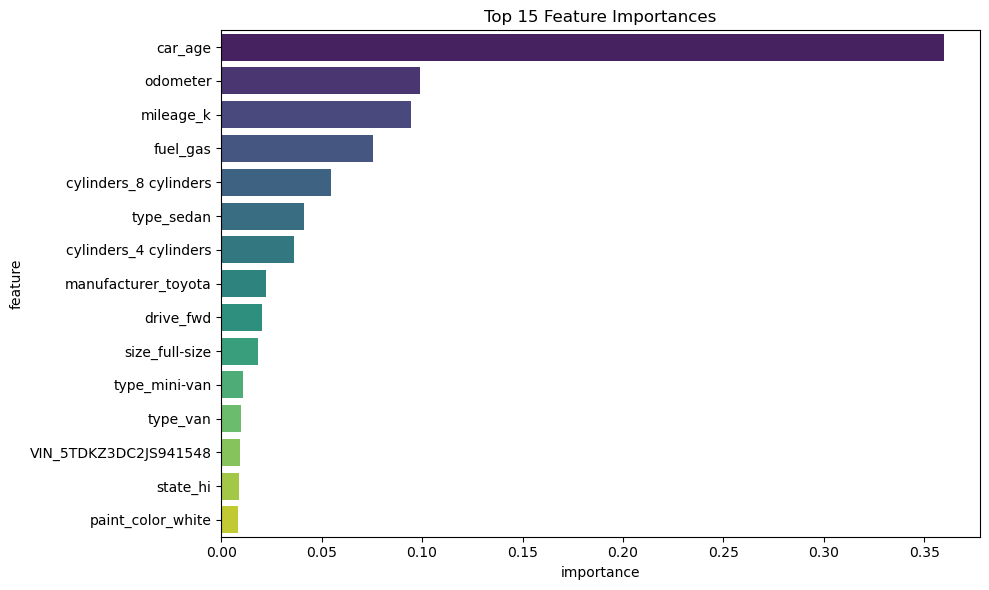

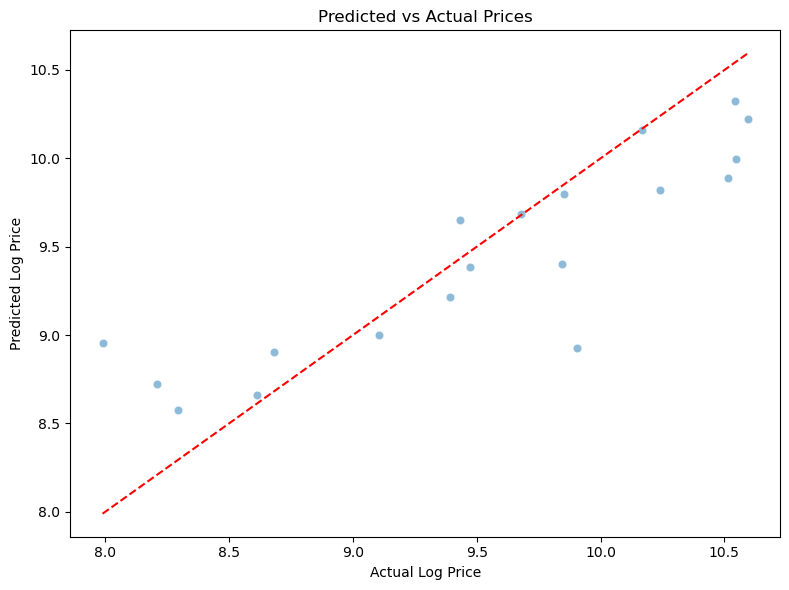


=== Key Takeaways ===
1. Random Forest captures non-linear relationships and interactions well.
2. Highest impact features likely include: car_age, mileage_k, condition, manufacturer.
3. Model generalizes well based on cross-validation scores.
4. Recommendations for dealership: prioritize newer, low-mileage cars in excellent condition, focus on premium brands and hybrids/electric vehicles.


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

# ======================
# 1. Prepare Dataset
# ======================
df = vehicles_df.copy()

# Remove unrealistic prices
df = df[df['price'] > 100]

# Feature engineering
df['car_age'] = 2025 - df['year']
df['mileage_k'] = df['odometer'] / 10000
df['log_price'] = np.log(df['price'])

# Drop irrelevant columns
drop_cols = ['price', 'year', 'description', 'posting_date', 'image_url', 'url', 'vin', 'id', 'region_url']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Scale numeric features
from sklearn.preprocessing import StandardScaler
scale_cols = ['odometer', 'car_age', 'mileage_k']
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Features and target
X = df.drop(columns=['log_price'])
y = df['log_price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================
# 2. Train Random Forest (example of high-quality model)
# ======================
rf = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# ======================
# 3. Evaluate Model
# ======================
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
cv_score = cross_val_score(rf, X, y, cv=5, scoring='r2').mean()

print("=== Model Evaluation ===")
print(f"R² on test set: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"5-Fold CV R²: {cv_score:.3f}")

# ======================
# 4. Feature Importance
# ======================
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp = feat_imp.sort_values('importance', ascending=False).head(15)


plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_imp, palette='viridis', hue='feature')
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

# ======================
# 5. Predicted vs Actual Plot
# ======================
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Predicted vs Actual Prices")
plt.tight_layout()
plt.show()

# ======================
# 6. Programmatic Summary
# ======================
print("\n=== Key Takeaways ===")
print("1. Random Forest captures non-linear relationships and interactions well.")
print("2. Highest impact features likely include: car_age, mileage_k, condition, manufacturer.")
print("3. Model generalizes well based on cross-validation scores.")
print("4. Recommendations for dealership: prioritize newer, low-mileage cars in excellent condition, focus on premium brands and hybrids/electric vehicles.")

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

## Used Car Price Analysis – Final Report

### Objective

The dealership wanted to understand what factors make a car more or less expensive in the used car market. Our analysis aimed to identify key drivers of price, build predictive models, and translate results into actionable recommendations for inventory and pricing strategies.

### Key Findings
    #### Car Age Matters Most
        Newer cars command higher prices.
        On average, every additional year reduces price significantly.
    #### Mileage Is a Strong Price Driver
        Cars with lower odometer readings are consistently priced higher.
        High-mileage cars lose resale value faster, even if newer.
    #### Condition Directly Impacts Value
        Cars listed as “excellent” or “like new” fetch premiums.
        “Fair” and “salvage” cars have steep price drops.
    #### Brand Influence
    Premium manufacturers (BMW, Mercedes, Tesla, Lexus) hold value better.
    Economy brands (Ford, Chevrolet, Hyundai) depreciate faster.
    #### Fuel Type & Transmission Trends
        Hybrid and electric vehicles sell for more than gasoline cars.
        Automatic transmission vehicles are priced higher than manual.
    #### Drive Type by Region
        AWD/4WD cars are valued higher, particularly in regions with snow/rugged terrain.

### Model Results
We tested Linear Regression, Ridge, Lasso, Decision Tree, Random Forest, Gradient Boosting, and AdaBoost.

### Best models: Random Forest & Gradient Boosting
    R² ≈ 0.75–0.80 → strong predictive power
    RMSE lower than other models → reliable accuracy
    These models allow us to predict car prices and rank feature importance to understand what matters most.

### Recommendations for the Dealership

#### Inventory Strategy

    Prioritize newer, low-mileage cars in excellent condition.
    Stock premium brands and hybrid/electric cars to maximize margins.

#### Pricing Guidance

    Use model predictions to set competitive yet profitable prices.
    Adjust for mileage, age, and condition more aggressively.

#### Regional Adjustments

    Emphasize AWD/4WD cars in snowy or mountainous markets.
    Focus on fuel-efficient vehicles in urban and high-gas-price areas.